<a href="https://colab.research.google.com/github/TienNguyen0712/data-science-foundations/blob/main/math_statistic/descriptive_startistics/descriptive_startistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Giới thiệu thống kê mô tả**

**Thống kê mô tả** là phương pháp dùng đẻ tóm tắt dữ liệu, mô tả các đặc điểm chính của dữ liệu và trinh bày dữ liệu bằng bảng và biểu đồ

**Thống kê mô tả** không dùng để suy luận hay dự đoán

Notebook này nhằm bổ trợ các kiến thức cho file md có trong repo thực hiện trên bộ dữ liệu **Iris Dataset**

## **2. Phân loại biến**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()

### **2.1. Biến định tính**

Hay biến phân loại:

- Thường có danh mục không phải là giá trị số
- Có thể giá trị số nhưng là mức độ xếp hạng

### **2.2. Biến định lượng**

Hay biến số:
- Là các số liên tục

Như trong ví dụ dưới đây trong bộ dữ liệu thì 4 đặc trưng đều là biến định lượng

In [2]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## **3. Thước đo xu hướng trung tâm**

- **Mean (Trung bình):** Cho biết giá trị trung tâm và khá nhạy cảm với ngoại lai

<small><i>Nhạy cảm với ngoại lai: Tức giá trị có thể bị thay đổi khi có 1 hoặc nhiều giá trị vượt bất thường</i></small>

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i
$$


In [3]:
iris_df.mean()

,0
sepal length (cm),5.843333
sepal width (cm),3.057333
petal length (cm),3.758000
petal width (cm),1.199333


- **Median (Trung vị):** Gía trị nằm giữa khi sắp xếp dữ liệu và ít ảnh hưởng bởi ngoại lai

$$
\tilde{x} =
\begin{cases}
x_{\left(\frac{n+1}{2}\right)}, & \text{n lẻ} \\
\frac{x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2}+1\right)}}{2}, & \text{n chẵn}
\end{cases}
$$


In [4]:
iris_df.median()

,0
sepal length (cm),5.80
sepal width (cm),3.00
petal length (cm),4.35
petal width (cm),1.30


- **Mode (Mốt):** Gía trị xuất hiện nhiều nhất, phù hợp hơn cho biến định tính

$$
\text{Mode} = \text{giá trị xuất hiện nhiều nhất trong tập dữ liệu}
$$


In [15]:
data = [5, 6, 7, 7, 7, 8, 9]
df = pd.DataFrame(data, columns=["score"])

df["score"].mode()


,score
0,7


## **4. Thước đo độ phân tán**

- **Range (Khoảng biến thiên):** Từ điểm cao nhất đến điểm thấp nhát dữ liệu kéo dài bao xa, rất nhạy cảm với ngoại lai

$$
\text{Range} = x_{\max} - x_{\min}
$$


In [5]:
range = iris_df.max() - iris_df.min()
range

,0
sepal length (cm),3.6
sepal width (cm),2.4
petal length (cm),5.9
petal width (cm),2.4


- **Variance (Phương sai):** Mức độ trung bình mà các giá trị lệch khỏi gia trị trung bình. Dữ liệu tập trung quanh trung bình hay phân tán ra sao ?

  - Phương sai tổng thể
  $$
\sigma^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2
$$

  - Phương sai mẫu
$$
s^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2
$$


In [6]:
iris_df.var()

,0
sepal length (cm),0.685694
sepal width (cm),0.189979
petal length (cm),3.116278
petal width (cm),0.581006


- **Standard Deviation (Độ lệch chuẩn)**: Dữ liệu thường lệch khỏi trung bình là bao nhiêu, trung bình mỗi quan sát cách giá trị trung bình bao xa.

Nếu **std lớn** -> biến động mạnh

  - Tổng thể
  $$
\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2}
$$

  - Mẫu
  $$
s = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2}
$$


In [7]:
iris_df.std()

,0
sepal length (cm),0.828066
sepal width (cm),0.435866
petal length (cm),1.765298
petal width (cm),0.762238


- **Interquartile Range (IQR):** Giúp xác định ngoại lai

$$
IQR = Q_3 - Q_1
$$


In [8]:
iqr = iris_df.quantile(0.75) - iris_df.quantile(0.25)
iqr

,0
sepal length (cm),1.3
sepal width (cm),0.5
petal length (cm),3.5
petal width (cm),1.5


## **5. Các thước đo vị trí**

- **Percentile (Phân vị):**

In [9]:
iris_df.quantile([0.25, 0.5, 0.75])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8


- **Quartile (Tứ phân vị )**

$$
Q_1 = P_{25}, \quad Q_2 = P_{50}, \quad Q_3 = P_{75}
$$


Trong bộ dữ liệu ta có các khoảng thứ phân vị lần lượt tương ứng với các cột đjăc trưng so với bên trái

*Ví dụ:*
- Đặc trưng **sepal length**
  - Q1: 5.1
  - Q2: 5.8
  - Q3: 6.4

## **6. Phân phối dữ liệu**

- **Skewness (Độ lệch):**
  - Skew > 0: Lệch phải
  - Skew < 0: Lệch trái

$$
\text{Skewness} = \frac{1}{n}\sum_{i=1}^{n}
\left(\frac{x_i - \bar{x}}{s}\right)^3
$$


In [10]:
iris_df.skew()

,0
sepal length (cm),0.314911
sepal width (cm),0.318966
petal length (cm),-0.274884
petal width (cm),-0.102967


Quan sát các đặc trưng trong bộ dữ liệu ta nhận thấy

- **sepal length và sepal width** có phân bố lệch phải( > 0)
- **petal length và petal width** có phân bố lệch trái ( < 0)

- **Kurtosis (Độ nhọn):**
  - Kurtosis cao: đỉnh nhọn
  - Kurtosis thấp: phân bố phẳng

$$
\text{Kurtosis} = \frac{1}{n}\sum_{i=1}^{n}
\left(\frac{x_i - \bar{x}}{s}\right)^4
$$


In [11]:
iris_df.kurtosis()

,0
sepal length (cm),-0.552064
sepal width (cm),0.228249
petal length (cm),-1.402103
petal width (cm),-1.340604


## **7. Các loại biểu đồ thường dùng**

- **Biểu đồ cột (Bar chart):** Dùng cho dữ liệu định tính, không nối các cột
  - ❓Trả lời cho câu hỏi nhóm nào nhiều hơn ? ít hơn ?

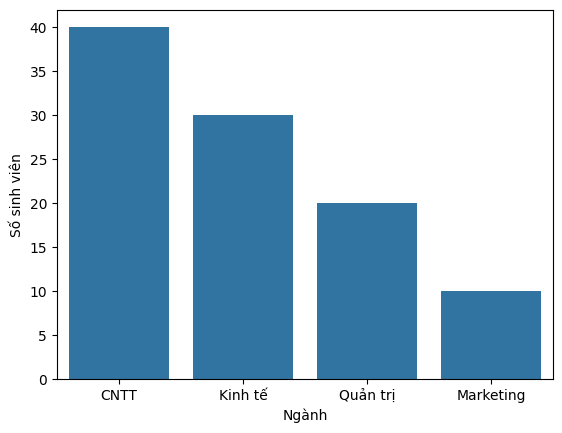

In [17]:
data_bar = pd.DataFrame({
    "Ngành": ["CNTT", "Kinh tế", "Quản trị", "Marketing"],
    "Số sinh viên": [40, 30, 20, 10]
})

sns.barplot(data=data_bar, x="Ngành", y="Số sinh viên")
plt.show()

- **Biểu đồ tròn (Pie chart):** Dùng cho dữ liệu định tính, tỷ lệ của các biến định tính, không nên dùng khi có quá nhiều nhóm
  - ❓Trả lời cho câu hỏi mỗi nhóm chiếm bao nhiêu phần trăm ?

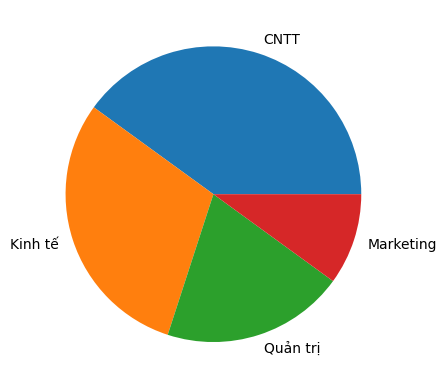

In [19]:
data_bar = pd.DataFrame({
    "Ngành": ["CNTT", "Kinh tế", "Quản trị", "Marketing"],
    "Số sinh viên": [40, 30, 20, 10]
})

plt.pie(data_bar["Số sinh viên"], labels=data_bar["Ngành"])
plt.show()

- **Histogram:** Dùng cho dữ liệu định lượng
  - ❓Trả lời cho câu hỏi dữ liệu phân bố như thế nào

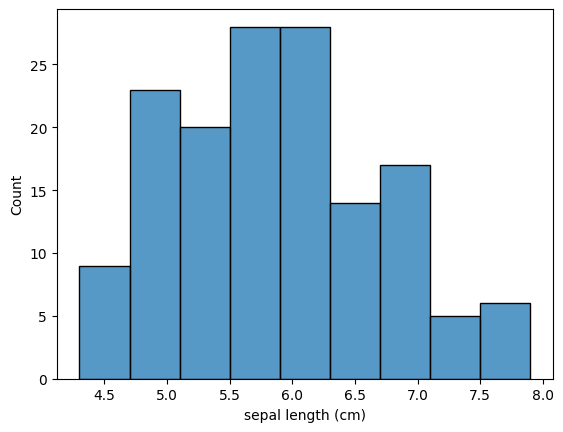

In [12]:
sns.histplot(data=iris_df, x="sepal length (cm)")
plt.show()

- **Biểu đồ hộp (Boxplot):** Dùng cho dữ liệu định lượng, so sánh nhiều nhóm, phát hiện ngoại lai nhanh
  - ❓Trả lời cho câu hỏi Dữ liệu có ngoại lệ không có lệch không ?

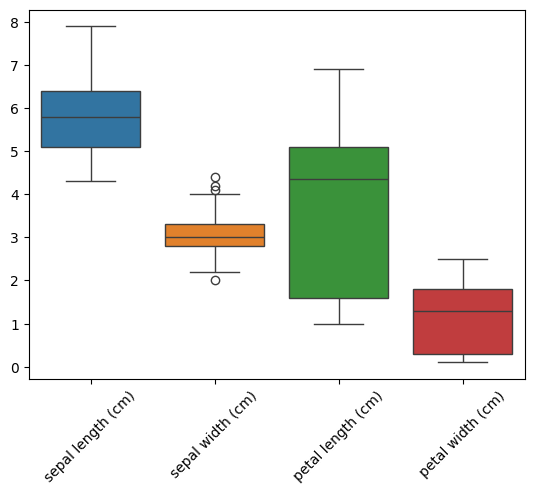

In [13]:
sns.boxplot(data=iris_df)
plt.xticks(rotation=45)
plt.show()

- **Biểu đồ đường (Line chart):** Dùng cho dữ liệu theo thời gian, không dùng cho biến định tính không có thứ tự
  - ❓Trả lời cho câu hỏi Xu hướng tăng hay giảm theo thời gian

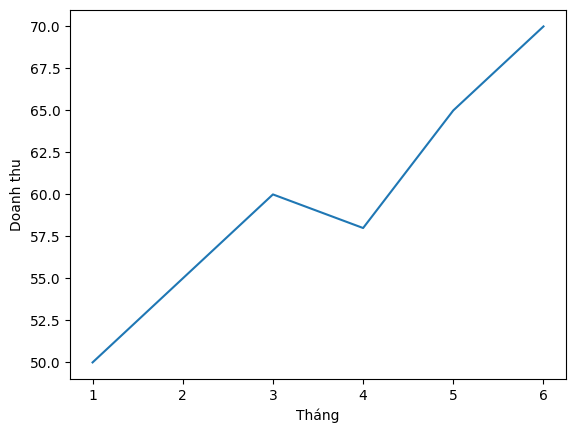

In [20]:
data_line = pd.DataFrame({
    "Tháng": [1, 2, 3, 4, 5, 6],
    "Doanh thu": [50, 55, 60, 58, 65, 70]
})

sns.lineplot(data=data_line, x="Tháng", y="Doanh thu")
plt.show()

- **Biểu đồ phân tán (Scatter plot):** Hai biến định lượng, thường dừng trước bước hồi quy / tương quan
  - ❓Trả lời cho câu hỏi hai biên có liên quan tới nhau không

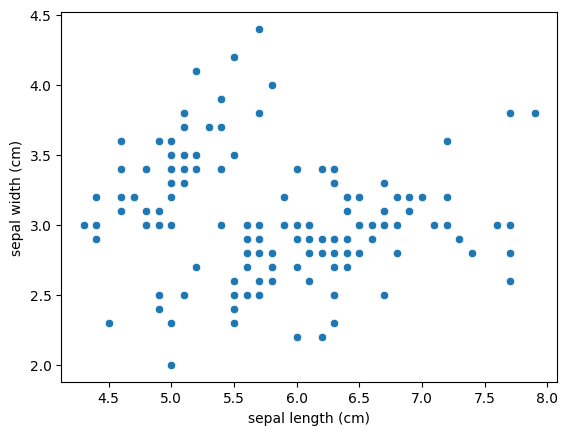

In [16]:
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)")
plt.show()

- **Biểu đồ tần số (Frequency Polygon):** Dùng cho dữ liệu định lượng, biểu diễn tần số, so snash nhiều phân phối, đánh giá xu hướng của dữ liệu định lượng
  - ❓Trả lời cho câu hỏi nhóm nào phân bố ra sao ?

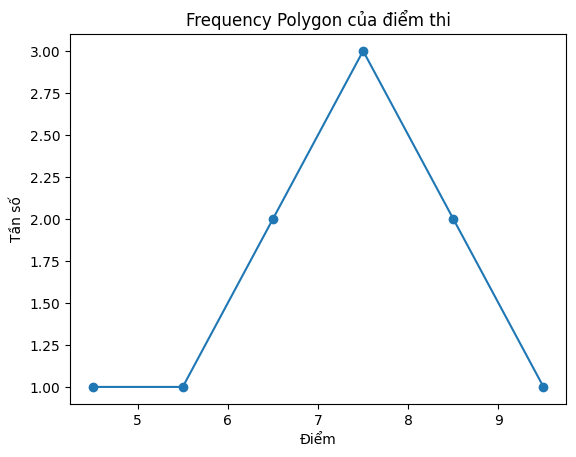

In [22]:
data = pd.DataFrame({
    "midpoint": [4.5, 5.5, 6.5, 7.5, 8.5, 9.5],
    "frequency": [1, 1, 2, 3, 2, 1]
})

plt.plot(data["midpoint"], data["frequency"], marker='o')
plt.xlabel("Điểm")
plt.ylabel("Tần số")
plt.title("Frequency Polygon của điểm thi")
plt.show()

## **8. Bảng thống kê mô tả**

In [14]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **9. Quy trình làm thống kê**

1. Xác định loại biến
2. Tính chỉ số phù hợp
3. Vẽ biểu đồ
4. Nhận xét kết quả (ngắn gọn, không suy luận)